# Linear regression

Import all the modules you will need in this notebook here:

In [1]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [2]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
file_path = get_path("fram.txt")
fram = pd.read_csv(file_path, sep="\t")

print(fram.head())
print(fram.describe())


     ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD YRS_CHD  DEATH  \
0  4988  female   57  135  186    NaN  120   150    0    1     pre      7   
1  3001  female   60  123  165    NaN  100   167   25    0      16     10   
2  5079  female   54  115  140    NaN   90   213    5    0       8      8   
3  5162  female   52  102  170    NaN  104   280   15    0      10      7   
4  4672  female   45   99  185    NaN  105   326   20    0       8     10   

   YRS_DTH    CAUSE  
0       11  unknown  
1       17  unknown  
2       13  unknown  
3       11  unknown  
4       17  unknown  
                ID          AGE          FRW          SBP       SBP10  \
count  1394.000000  1394.000000  1394.000000  1394.000000  767.000000   
mean   4737.184362    52.431133   105.365136   148.086083  148.040417   
std    1073.406896     4.781507    17.752489    28.022062   25.706664   
min    1070.000000    45.000000    52.000000    90.000000   94.000000   
25%    3890.250000    48.000000    94.00

Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [3]:
# exercise 2
# Put your solution here!
def rescale(series):
    sigma = series.std()
    centered = series - series.mean()
    rescaled = centered / (2 * sigma)
    return rescaled



Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [4]:
# exercise 3
# Put your solution here!

df_scaled = fram.select_dtypes(include='number').apply(rescale)
df_scaled.columns = ['s' + col for col in df_scaled.columns]
fram = pd.concat([fram, df_scaled], axis=1)
print(fram)

        ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sAGE  \
0     4988  female   57  135  186    NaN  120   150    0    1  ...  0.477764   
1     3001  female   60  123  165    NaN  100   167   25    0  ...  0.791473   
2     5079  female   54  115  140    NaN   90   213    5    0  ...  0.164056   
3     5162  female   52  102  170    NaN  104   280   15    0  ... -0.045083   
4     4672  female   45   99  185    NaN  105   326   20    0  ... -0.777070   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...  ...       ...   
1389  4132    male   51  100  160    NaN   98   216   30    0  ... -0.149653   
1390  5418    male   50   95  174    NaN  106   192    5    0  ... -0.254223   
1391  6260    male   57   88  144    NaN   96   184   20    0  ...  0.477764   
1392  5786    male   62   87  156    NaN   90   255    0    0  ...  1.000612   
1393  6071    male   45   83  156    NaN   90   255   15    0  ... -0.777070   

          sFRW      sSBP sSBP10      sD

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [5]:
# exercise 4
# Put your solution here!
fit = smf.ols(formula='SBP ~ sFRW + sCHOL + SEX', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           4.13e-40
Time:                        19:44:13   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [6]:
# exercise 5
# Put your solution here!
fit = smf.ols(formula='SBP ~ sFRW + sCHOL + SEX + sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           2.44e-46
Time:                        19:44:13   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

The R-squared value increases by 0.021 with the inclusion of age, which increases the explanatory power of the model. 
 
sFRW explains the target variable the most as it has the largest absolute coefficient and the t-value is the highest, also the P-value is 0.000 which shows that sFRW is statistically significant.

***

Try to add to the model all the interactions with other variables. 

In [7]:
# exercise 6
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + SEX:sCHOL + sFRW:sAGE + SEX:sAGE + sCHOL:sAGE', data=fram).fit()
#print(fit.summary())

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

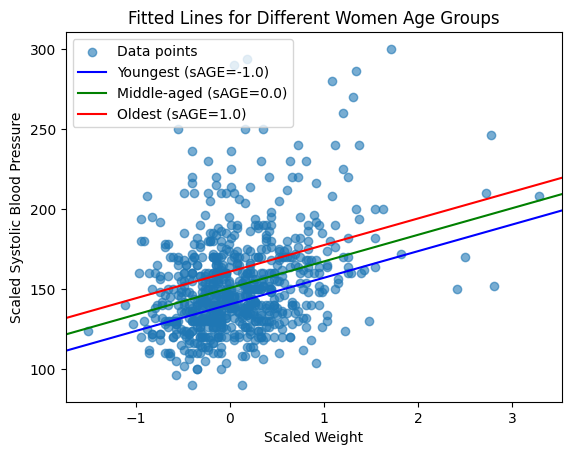

In [8]:
# exercise 7
# Put your solution here!
age_groups = [-1.0, 0.0, 1.0]  
labels = ['Youngest (sAGE=-1.0)', 'Middle-aged (sAGE=0.0)', 'Oldest (sAGE=1.0)']

plt.scatter(fram[fram.SEX == 'female']['sFRW'], fram[fram.SEX == 'female']['SBP'],  alpha=0.6,label='Data points')

intercept = fit.params.Intercept
slope_FRW = fit.params.sFRW

youngest = intercept + fit.params["sAGE"] * (-1.0)
middle_aged = intercept + fit.params["sAGE"] * (0.0)
oldest = intercept + fit.params["sAGE"] * (1.0)

abline_plot(intercept=youngest, slope=slope_FRW, ax=plt.gca(), color="blue", label=labels[0])
abline_plot(intercept=middle_aged, slope=slope_FRW, ax=plt.gca(), color="green", label=labels[1])
abline_plot(intercept=oldest, slope=slope_FRW, ax=plt.gca(), color="red", label=labels[2])


plt.xlabel('Scaled Weight')
plt.ylabel('Scaled Systolic Blood Pressure')
plt.title('Fitted Lines for Different Women Age Groups')
plt.legend()
plt.show()


How does the dependence of blood pressure on weight change as a person gets older?
***

Based on the slope of the fitted lines, the dependence of blood pressure on weight decreases as the person (I only considered women) gets older.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

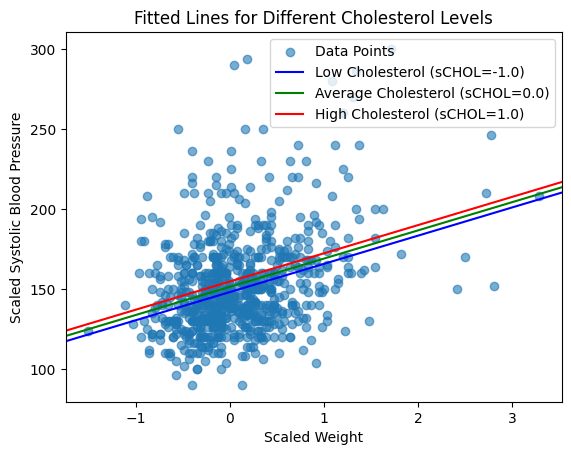

In [9]:
# exercise 8
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + sFRW:sCIG + SEX:sCHOL  + SEX:sAGE + SEX:sCIG + sCHOL:sAGE + sCHOL:sCIG + sAGE:sCIG', data=fram).fit()

chol_groups = [-1.0, 0.0, 1.0]
chol_labels = ['Low Cholesterol (sCHOL=-1.0)', 'Average Cholesterol (sCHOL=0.0)', 'High Cholesterol (sCHOL=1.0)']
plt.scatter(fram[fram.SEX == 'female']['sFRW'], fram[fram.SEX == 'female']['SBP'], alpha=0.6,label='Data Points')

intercept = fit.params.Intercept
slope_FRW = fit.params.sFRW

low = intercept + fit.params["sCHOL"] * (-1.0)
avg = intercept + fit.params["sCHOL"] * (0.0)
high = intercept + fit.params["sCHOL"] * (1.0)

abline_plot(intercept=low, slope=slope_FRW, ax=plt.gca(), color="blue", label=chol_labels[0])
abline_plot(intercept=avg, slope=slope_FRW, ax=plt.gca(), color="green", label=chol_labels[1])
abline_plot(intercept=high, slope=slope_FRW, ax=plt.gca(), color="red", label=chol_labels[2])


plt.xlabel('Scaled Weight')
plt.ylabel('Scaled Systolic Blood Pressure')
plt.title('Fitted Lines for Different Cholesterol Levels')
plt.legend()
plt.show()

How does the model and its accuracy look?

***

I checked fit.summary() and the R-squared value of this model is 0.153 and not so ideal. I can see that the data points are scattered around the fitted lines, perhaps more explanatory variables are needed to further improve the accuracy of the model.

***

# Logistic regression

In [10]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [11]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram["SBP"] >= 140) | (fram["DBP"] >= 90)
fram["HIGH_BP"] = fram["HIGH_BP"].map(int)
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW",data=fram,family=sm.families.Binomial(sm.genmod.families.links.Logit())).fit()
#print(fit.summary())
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)

0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [12]:
# exercise 10
# Put your solution here!
fit = smf.glm('HIGH_BP ~ sFRW + SEX + sAGE + sFRW:SEX + sFRW:sAGE + SEX:sAGE', data=fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate)

0.3278335724533716


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

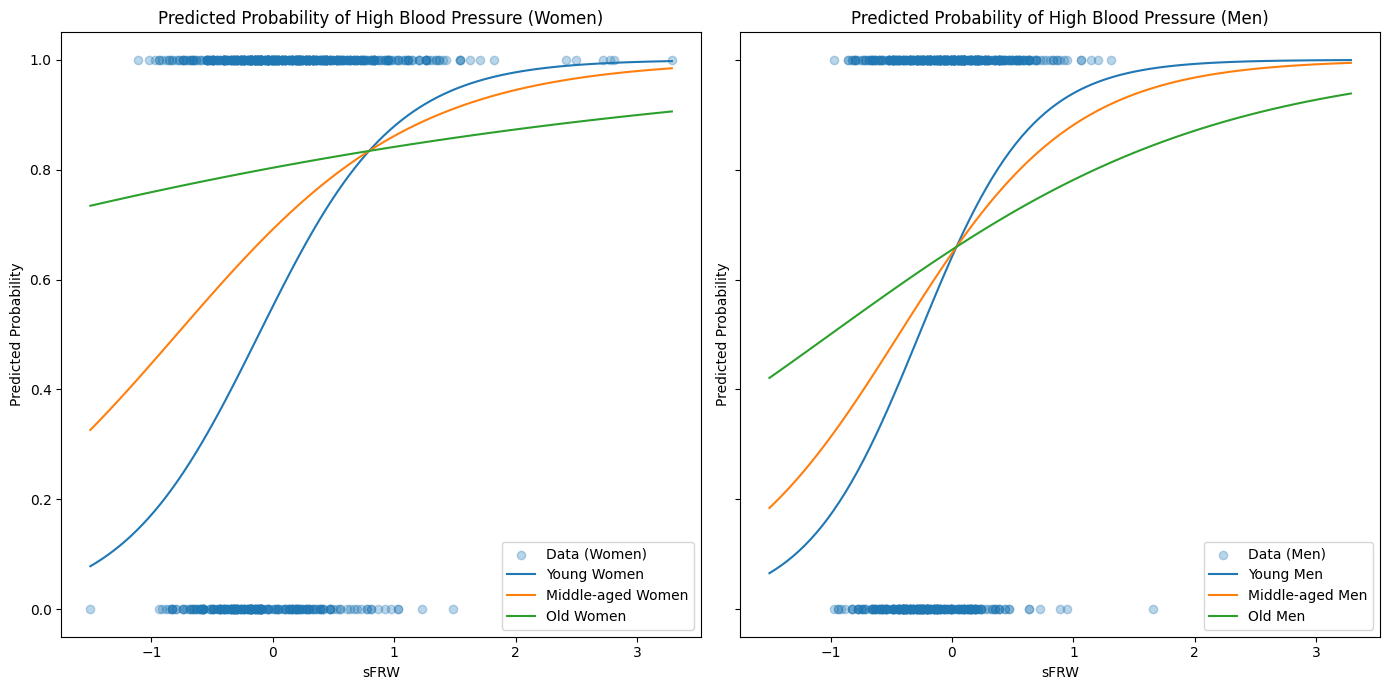

In [13]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

def predict_high_bp(weights, age, sex, fit):
    data = pd.DataFrame({
        'sFRW': weights,
        'sAGE': age,
        'SEX': sex
    })
    data['SEX:sFRW'] = data['sFRW'] * (data['SEX'] == 'male').astype(int)
    return fit.predict(data)

avg_age = fram['sAGE'].mean()
weights = np.linspace(fram['sFRW'].min(), fram['sFRW'].max(), 100)

age_groups = {
    "Young": avg_age - 1,      
    "Middle-aged": avg_age,    
    "Old": avg_age + 1         
}

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
fram_women = fram[fram['SEX'] == 'female']
fram_men = fram[fram['SEX'] == 'male']

axes[0].scatter(fram_women['sFRW'], fram_women['HIGH_BP'], alpha=0.3, label='Data (Women)')
for age_label, age_value in age_groups.items():
    axes[0].plot(weights, predict_high_bp(weights, age_value, 'female', fit), label=f'{age_label} Women')

axes[1].scatter(fram_men['sFRW'], fram_men['HIGH_BP'], alpha=0.3, label='Data (Men)')
for age_label, age_value in age_groups.items():
    axes[1].plot(weights, predict_high_bp(weights, age_value, 'male', fit), label=f'{age_label} Men')

for ax, gender in zip(axes, ['Women', 'Men']):
    ax.set_title(f'Predicted Probability of High Blood Pressure ({gender})')
    ax.set_xlabel('sFRW')
    ax.set_ylabel('Predicted Probability')
    ax.legend()

plt.tight_layout()
plt.show()

How do the models with different ages and genders differ from each other?

***

For both men and women, younger individuals are more sensitive to changes in weight than middle-aged and older individuals.  
However, age is still a key factor, as older people have the highest risk of hypertension compared to younger age groups, although the dependence on weight is reduced. 

For gender differences, men are more affected by weight and their overall risk of hypertension is higher than that of women. 

***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [14]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    train = df.sample(frac=train_fraction, random_state=None)
    test = df.drop(train.index)
    return train, test


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [15]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error_model=[]
error_null=[]

for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm('HIGH_BP ~ sFRW + SEX + sAGE + sFRW:SEX + sFRW:sAGE + SEX:sAGE', data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP == 1)) | ((pred > 0.5) & (test.HIGH_BP == 0)))
    error_model.append(error_rate)
    error_null.append((1-test.HIGH_BP).mean())

print(f"""
    Model Error Rate:   {pd.Series(error_model).mean()}
    Null Error Rate :   {pd.Series(error_null).mean()}
""")



    Model Error Rate:   0.3311827956989247
    Null Error Rate :   0.3488530465949821



## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [16]:
# exercise 14
# Put your solution here!
fram['hasCHD'] = (fram['CHD'] > 0).astype(int)
avg_hasCHD = fram['hasCHD'].mean()
print(avg_hasCHD)

0.22022955523672882


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [17]:
# exercise 15
# Put your solution here!
fit = smf.glm('hasCHD ~ sFRW + sCHOL + sCIG + sFRW:sCHOL + sFRW:sCIG + sCHOL:sCIG', data=fram, family=sm.families.Binomial()).fit()
pred = fit.predict(fram)
error_rate = np.mean(((pred < 0.5) & (fram["hasCHD"] == 1)) | ((pred >= 0.5) & (fram["hasCHD"] == 0)))
#print(fit.summary())
print(error_rate)

0.22022955523672882


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

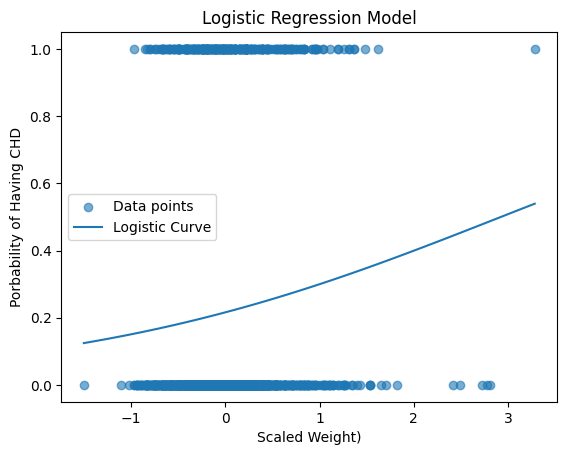

In [18]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

X= np.linspace(fram['sFRW'].min(), fram['sFRW'].max())
p = fit.params
plt.scatter(fram["sFRW"], fram["hasCHD"], alpha=0.6, marker="o", label="Data points")
plt.plot(X, logistic(p.Intercept + X * p.sFRW), label="Logistic Curve")
plt.xlabel("Scaled Weight)")
plt.ylabel("Porbability of Having CHD")
plt.legend()
plt.title("Logistic Regression Model")
plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
The error rate is approximately 0.22, which is relatively lower than 0.3, ensuring the model's accuracy.  
However, in real-world medical applications, greater precision is required. The Pseudo R-squared value is only 0.02, indicating that the model's explanatory power is quite limited.  
Nevertheless, it reveals some practical insights, as the key predictors are statistically significant, and the relationship between having CHD and weight appears reasonable.


***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [19]:
# exercise 17
# Put your solution here!
test = {"CHOL": 200,"CIG": 17,"FRW": 100}
point = {"sCHOL": (test["CHOL"] - fram["CHOL"].mean()) / (2 * fram["CHOL"].std()),"sCIG": (test["CIG"] - fram["CIG"].mean()) / (2 * fram["CIG"].std()),"sFRW": (test["FRW"] - fram["FRW"].mean()) / (2 * fram["FRW"].std())}
X = (
    fit.params.Intercept +
    fit.params.sCHOL * point["sCHOL"] +
    fit.params.sCIG * point["sCIG"] +
    fit.params.sFRW * point["sFRW"] +
    fit.params["sFRW:sCHOL"] * point["sFRW"] * point["sCHOL"] +
    fit.params["sFRW:sCIG"] * point["sFRW"] * point["sCIG"] +
    fit.params["sCHOL:sCIG"] * point["sCHOL"] * point["sCIG"] 

)

predicted = logistic(X)
print("Predicted probability of CHD:", predicted)

Predicted probability of CHD: 0.2161616602504101
